In [1]:
import pandas as pd
import csv
import os
import matplotlib.pyplot as plt


#Question: Is it possible to see any correlation between shooter video games and gun violence in the U.S. by looking at videogame sales and gun violence?
#


#csv_path = os.path.join("..","Resources","Video_Games_Sales_as_at_22_Dec_2016.csv")
csv_path = "..\Resources\Video_Games_Sales_as_at_22_Dec_2016.csv"
gun_violence_csv = "..\Resources\gun-violence-data_01-2013_03-2018.csv"


vg2016_df = pd.read_csv(csv_path)
gun2013_2018 = pd.read_csv(gun_violence_csv)

print(vg2016_df.columns)
# group_genre = vg2016_df
# group_genre

cleaned_df = vg2016_df[["Name","Genre", "NA_Sales","Year_of_Release","Rating","User_Count"]]

type(cleaned_df)
cleaned_df = cleaned_df.sort_values(by= "Year_of_Release",ascending=False)

cleaned_df = cleaned_df.loc[cleaned_df['Genre'] == "Shooter"]
#cleaned_df.value_counts
#count used to determine how many "shooter" games released per year
grouped_year_df = cleaned_df.groupby("Year_of_Release")
max_year = grouped_year_df.count()
#print(max_year)
shooters_per_year = max_year["Name"]
shooters_per_year= pd.DataFrame(shooters_per_year).reset_index()
shooters_per_year =shooters_per_year.rename(columns = {"Name":"Number_of_Shooters_Released"})
print(shooters_per_year.head())

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')
   Year_of_Release  Number_of_Shooters_Released
0           1980.0                            2
1           1981.0                           10
2           1982.0                            5
3           1983.0                            1
4           1984.0                            3


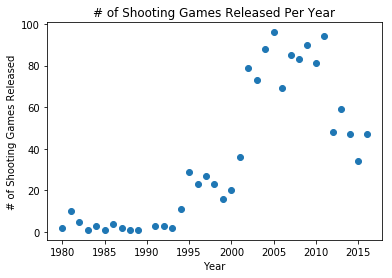

In [2]:
games_year_x = shooters_per_year["Year_of_Release"]
games_year_y = shooters_per_year["Number_of_Shooters_Released"]

plt.xlabel("Year")
plt.ylabel("# of Shooting Games Released")
plt.title( "# of Shooting Games Released Per Year")
plt.scatter(games_year_x,games_year_y

In [3]:
#clean gun violence data from 2013-2018 dataset

#gun2013_2018.head()
print(gun2013_2018.columns)

gun2013_2018_clean = gun2013_2018[['date','state','city_or_county','gun_type','latitude','longitude','participant_age']]
gun2013_2018_clean = gun2013_2018_clean.dropna()

print(gun2013_2018_clean.head())

#gun2013_2018_clean = (gun2013_2018_clean.groupby(["date"])).count()

#gun2013_2018_clean.value_count()
#need to change date to just the year


Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')
          date           state city_or_county                      gun_type  \
2   2013-01-01            Ohio         Lorain        0::Unknown||1::Unknown   
4   2013-01-07  North Carolina     Greensboro        0::Handgun||1::Handgun   
6   2013-01-19      New Mexico    Albuquerque  0::22 LR||1::223 Rem [AR-15]   
10  2013-01-23       Tennessee    Chattanooga                    0::Unknown   

In [4]:

#Change date to diplay just the year

gun2013_2018_clean.loc[gun2013_2018_clean['date'].str.contains('2013'), 'date'] = '2013'
gun2013_2018_clean.loc[gun2013_2018_clean['date'].str.contains('2014'), 'date'] = '2014'
gun2013_2018_clean.loc[gun2013_2018_clean['date'].str.contains('2015'), 'date'] = '2015'
gun2013_2018_clean.loc[gun2013_2018_clean['date'].str.contains('2016'), 'date'] = '2016'
gun2013_2018_clean.loc[gun2013_2018_clean['date'].str.contains('2017'), 'date'] = '2017'
gun2013_2018_clean.loc[gun2013_2018_clean['date'].str.contains('2018'), 'date'] = '2018'
#determine how many violent crimes occured per year
crime_year = gun2013_2018_clean["date"].value_counts()

crime_year_df = pd.DataFrame(crime_year)
crime_year_df = crime_year_df.reset_index()
crime_year_df = crime_year_df.rename(columns={"index":"Year","date":"# of crimes"})
#sort year by ascending order
crime_year_df = crime_year_df.sort_values(by=["Year"], ascending = True)
crime_year_df

,Year,# of crimes
5,2013,93
4,2014,3879
2,2015,13716
1,2016,22606
0,2017,37331
3,2018,7553


This data is from January 2013 to March 2018. From a quick glance, it's apparant that gun violence is increasing per year, 2018 is only documented for the first quarter (until March) so 2018 data set is not complete.


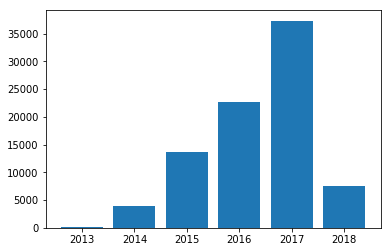

In [5]:
#show bar graph of violent crime change over time

plt.bar(crime_year_df["Year"],crime_year_df["# of crimes"])

print("This data is from January 2013 to March 2018. From a quick glance, it's apparant that gun violence is increasing per year, 2018 is only documented for the first quarter (until March) so 2018 data set is not complete.")